In [118]:
# import pandas_ta as ta
import ta
import pandas as pd
import numpy as np
from datetime import datetime
import main_functions
import plotly.graph_objects as go
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [119]:
import importlib
# If you want to update the module:
importlib.reload(main_functions)
from main_functions import *

In [120]:
pd.set_option('display.max_rows', 400)  # Set the maximum number of rows to display

# Defining the variables

In [200]:
ticker = "BTCUSDT"
# timeframe = "1h"
# start = "2023-01-01"
timeframe = "1d"
start = "2019-09-08"
start_date = datetime.strptime(start, "%Y-%m-%d")
end = str(datetime.now())
# Calculate the difference in days
day = (datetime.now() - start_date).days

# OTHER PARAMETERS
fast_ma_period=20
slow_ma_period=50
rsi_period=14
rsi_value=50

sl_perc= 5
tp_perc= 10

In [189]:
df = getdata(ticker, timeframe, day)
df

,Open,High,Low,Close,Volume
timestamp,,,,,
2019-09-08,10000.00,10412.65,10000.00,10391.63,3096.291
2019-09-09,10316.62,10475.54,10077.22,10307.00,14824.373
2019-09-10,10307.00,10382.97,9940.87,10102.02,9068.955
2019-09-11,10094.27,10293.11,9884.31,10159.55,10897.922
2019-09-12,10163.06,10450.13,10042.12,10415.13,15609.634
...,...,...,...,...,...
2023-10-23,29981.40,35981.90,29869.40,33074.00,987741.536
2023-10-24,33074.00,35300.00,32833.50,33917.00,921993.063
2023-10-25,33917.00,35154.30,33660.60,34487.70,465367.144


In [193]:
# Define the function for the trading strategy
def getSignals(df, fast_ma_period=20, slow_ma_period=50, rsi_period=14, rsi_value=50):
    # df = getdata(ticker, timeframe)  # Assuming you have a getdata function that fetches the data

    # Calculate the moving averages
    df['shifted_open'] = df.Open.shift(-1)
    df['Fast_MA'] = ta.trend.sma_indicator(df['Close'], window=fast_ma_period)
    df['Slow_MA'] = ta.trend.sma_indicator(df['Close'], window=slow_ma_period)
    # Calculate the RSI
    rsi = ta.momentum.RSIIndicator(df['Close'], window=rsi_period)
    df['RSI'] = rsi.rsi()

    df['buySignal'] = np.where(
        (df['Fast_MA'] > df['Slow_MA']) &
        (df['Fast_MA'].shift(1) <= df['Slow_MA'].shift(1)) &
        (df['RSI'] > rsi_value),
        1,
        0
    )
    
    return df

In [167]:
df = getSignals(df, fast_ma_period=fast_ma_period, slow_ma_period=slow_ma_period, rsi_period=rsi_period, rsi_value=rsi_value)
df

,Open,High,Low,Close,Volume,shifted_open,Fast_MA,Slow_MA,RSI,buySignal
timestamp,,,,,,,,,,
2019-09-08,10000.00,10412.65,10000.00,10391.63,3096.291,10316.62,NaN,NaN,NaN,0
2019-09-09,10316.62,10475.54,10077.22,10307.00,14824.373,10307.00,NaN,NaN,NaN,0
2019-09-10,10307.00,10382.97,9940.87,10102.02,9068.955,10094.27,NaN,NaN,NaN,0
2019-09-11,10094.27,10293.11,9884.31,10159.55,10897.922,10163.06,NaN,NaN,NaN,0
2019-09-12,10163.06,10450.13,10042.12,10415.13,15609.634,10414.96,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
2023-10-23,29981.40,35981.90,29869.40,33074.00,987741.536,33074.00,28239.435,27177.836,85.330772,0
2023-10-24,33074.00,35300.00,32833.50,33917.00,921993.063,33917.00,28547.295,27339.896,86.952942,0
2023-10-25,33917.00,35154.30,33660.60,34487.70,465367.144,34487.80,28901.760,27514.056,87.926345,0


In [168]:
# Assuming you have a DataFrame 'df' and want to find rows where 'buySignal' is equal to 1
buy_signal_rows = df[df['buySignal'] == 1]
buy_signal_rows

,Open,High,Low,Close,Volume,shifted_open,Fast_MA,Slow_MA,RSI,buySignal
timestamp,,,,,,,,,,
2019-11-05,9395.47,9457.13,9164.33,9313.20,113738.226,9313.10,8703.3025,8682.6032,58.971389,1
2020-01-08,8150.90,8468.42,7870.11,8059.84,321225.114,8059.77,7366.6190,7327.0674,65.355463,1
2020-04-19,7242.49,7258.42,7055.00,7118.03,216975.114,7118.04,6938.6770,6901.2634,53.523251,1
2020-07-27,9939.68,11488.00,9928.61,11047.58,744752.400,11047.58,9437.6935,9382.6004,82.893621,1
2020-10-13,11530.37,11562.00,11308.00,11419.36,199115.115,11419.36,10860.0840,10833.4172,63.064975,1
2021-08-01,41448.10,42614.98,39350.40,39846.78,487529.044,39846.78,35021.1210,34921.0338,63.349047,1
2021-10-11,54700.00,57880.00,54458.00,57500.01,314868.050,57500.01,48011.8605,47737.2122,71.347360,1
2022-03-19,41751.60,42446.60,41500.00,42188.20,186459.954,42188.20,40446.2150,40406.6474,56.516074,1
2022-03-27,44489.30,47047.00,44416.00,46820.80,269280.228,46820.90,41360.3500,41142.4184,68.662433,1


# Backtest

In [194]:
def backtest(df_s, fast_ma_period=20, slow_ma_period=50, rsi_period=14, rsi_value=50, sl_perc=(5*0.01), tp_perc=(10*0.01)):
    print("fast_ma_period", fast_ma_period)
    print("slow_ma_period", slow_ma_period)
    print("rsi_period", rsi_period)
    print("sl_perc", sl_perc)
    print("tp_perc", tp_perc)
    print("rsi_value", rsi_value)
    df = getSignals(df_s, fast_ma_period=fast_ma_period, slow_ma_period=slow_ma_period, rsi_period=rsi_period, rsi_value=rsi_value)  # Use the trading_strategy function to get signals

    in_position = False
    buy_pos = False
    sell_pos = False

    results_df = pd.DataFrame(columns=['ticker', 'returns', 'winrate', 'trades', 'buy&hold_ret%'])
    buydates, buyprices = [], []
    selldates, sellprices = [], []
    profits = []

    for index, row in df.iterrows():
        # long position block
        if not in_position and row['buySignal'] == 1:
            buyprice = row['Close']
            buydates.append(index)
            buyprices.append(buyprice)
            in_position = True
            buy_pos = True
            stop_loss = buyprice * (1 - sl_perc)
            target_price = buyprice * (1 + tp_perc)

        elif in_position and buy_pos:
            if row['Low'] <= stop_loss:
                selldates.append(index)
                sellprice = stop_loss
                sellprices.append(sellprice)
                in_position = False
                buy_pos = False
                profits.append((sellprice - buyprice) / buyprice - 0.001)  # Account for a small commission fee (0.1%)

            elif row['High'] >= target_price:
                selldates.append(index)
                sellprice = target_price
                sellprices.append(sellprice)
                in_position = False
                buy_pos = False
                profits.append((sellprice - buyprice) / buyprice - 0.001)  # Account for a small commission fee (0.1%)

    try:
        if len(buydates) == 0:
            print("No trades were made.")
        else:
            returns = (pd.Series(profits, dtype=float) + 1).prod() - 1
            returns = round(returns * 100, 2)

            wins = sum(1 for i in profits if i > 0)
            winrate = round((wins / len(buydates)) * 100, 2)
            ct = min(len(buydates), len(selldates))
            buy_hold_ret = (df['Close'][-1] - df['Open'][0]) / df['Open'][0] * 100
            # Calculate your custom score here (e.g., a weighted combination of returns and win rate)
            custom_score = returns * (winrate / 100)
            
            results_df.loc[len(results_df)] = [ticker, returns, winrate, ct, buy_hold_ret]
            print(f'{ticker}, winrate={winrate}%, returns={returns}%, no. of trades = {ct}, buy&hold_ret = {buy_hold_ret}%')
    except:
        print('Invalid input')

    return {
        'buydates': buydates,
        'buyprices': buyprices,
        'selldates': selldates,
        'sellprices': sellprices,
        'profits': profits,
        # Other results...
    }, results_df, custom_score

def displayTrades(**kwargs):
    # Access the trade data and other results from kwargs
    buydates = kwargs['buydates']
    buyprices = kwargs['buyprices']
    selldates = kwargs['selldates']
    sellprices = kwargs['sellprices']
    profits = kwargs['profits']
    
    ct = min(len(buydates),len(selldates))
    dfr =pd.DataFrame()
    dfr['buydates']= buydates[:ct]
    dfr['buyprice']= buyprices[:ct]
    dfr['selldates'] = selldates[:ct]
    dfr['sellprice'] = sellprices[:ct]
    dfr['profits'] = (profits[:ct])
    dfr['commulative_returns'] = ((pd.Series(profits) + 1).cumprod())
    dfr['tradeSide'] = np.where(dfr['buydates'] < dfr['selldates'], 'Long', 'Short')
    return dfr

In [201]:
results_data, results_df, score = backtest(df, fast_ma_period, slow_ma_period, rsi_period, rsi_value, sl_perc*0.01, tp_perc*0.01)

fast_ma_period 20
slow_ma_period 50
rsi_period 14
sl_perc 0.05
tp_perc 0.1
rsi_value 50
BTCUSDT, winrate=28.57%, returns=-13.57%, no. of trades = 14, buy&hold_ret = 236.575%


In [202]:
results_df

,ticker,returns,winrate,trades,buy&hold_ret%
0,BTCUSDT,-13.57,28.57,14,236.575


In [197]:
score

-3.876949

In [198]:
dfr = displayTrades(**results_data)
dfr

,buydates,buyprice,selldates,sellprice,profits,commulative_returns,tradeSide
0,2019-11-05,9313.20,2019-11-08,8847.5400,-0.051,0.949000,Long
1,2020-01-08,8059.84,2020-01-14,8865.8240,0.099,1.042951,Long
2,2020-04-19,7118.03,2020-04-20,6762.1285,-0.051,0.989760,Long
3,2020-07-27,11047.58,2020-08-02,10495.2010,-0.051,0.939283,Long
4,2020-10-13,11419.36,2020-10-21,12561.2960,0.099,1.032272,Long
5,2021-08-01,39846.78,2021-08-03,37854.4410,-0.051,0.979626,Long
6,2021-10-11,57500.01,2021-10-12,54625.0095,-0.051,0.929665,Long
7,2022-03-19,42188.20,2022-03-27,46407.0200,0.099,1.021702,Long
8,2022-07-28,23836.20,2022-08-02,22644.3900,-0.051,0.969595,Long
9,2022-10-31,20482.00,2022-11-08,19457.9000,-0.051,0.920146,Long


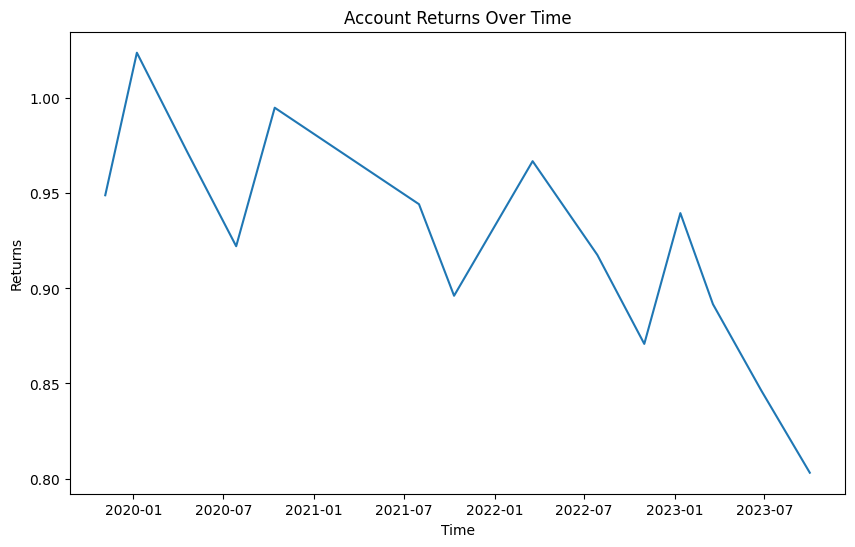

In [130]:
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(10,6))

# Plot the account balance column
plt.plot(dfr.buydates, dfr.commulative_returns)

# Add labels to the plot
plt.title('Account Returns Over Time')
plt.xlabel('Time')
plt.ylabel('Returns')

# Display the plot
plt.show()

# Set Final Bot Parameters

In [131]:
ticker = "BTCUSDT"
timeframe = "1d"        # ----> TO BE OPTIMIZED
usdt_amount = 15


fast_ma_period=18           # ----> TO BE OPTIMIZED
slow_ma_period=75           # ----> TO BE OPTIMIZED
rsi_period=14               # ----> TO BE OPTIMIZED
rsi_value=50                # ----> TO BE OPTIMIZED
sl_perc=5                   # ----> TO BE OPTIMIZED
tp_perc=10                  # ----> TO BE OPTIMIZED

# Optuna Hyperparameter Optimization

In [203]:
import optuna # !pip install optuna

# streamlit inputs should be mult,HL and risk upper and lower values also number of trials (default=100)

def objective(trial):
    fast_ma_period = trial.suggest_int("fast_ma_period", 15, 30)
    slow_ma_period = trial.suggest_int("slow_ma_period", 50, 75)
    rsi_period = trial.suggest_int("rsi_period", 11, 24)
    rsi_value = trial.suggest_int("rsi_value", 45, 60)
    sl_perc = trial.suggest_int("sl_perc", 3, 9)
    tp_perc = trial.suggest_int("tp_perc", 5, 12)
    
    # Run your strategy with the trial parameters and calculate a score
    x, y, score = backtest(df, fast_ma_period, slow_ma_period, rsi_period, sl_perc=sl_perc*0.01, tp_perc=tp_perc*0.01)
    return score

# Create an Optuna study and run optimization
study = optuna.create_study(direction="maximize")  # You can also use "minimize" depending on your objective
study.optimize(objective, n_trials=100)

# Retrieve the best parameters and score
best_params = study.best_params
best_score = study.best_value

print("Best Parameters:", best_params)
print("Best Score:", best_score)


[I 2023-10-28 00:23:23,053] A new study created in memory with name: no-name-edee72eb-08b8-44c8-ae2e-cdb936398171
[I 2023-10-28 00:23:23,240] Trial 0 finished with value: 18.53 and parameters: {'fast_ma_period': 15, 'slow_ma_period': 71, 'rsi_period': 19, 'rsi_value': 55, 'sl_perc': 4, 'tp_perc': 10}. Best is trial 0 with value: 18.53.


fast_ma_period 15
slow_ma_period 71
rsi_period 19
sl_perc 0.04
tp_perc 0.1
rsi_value 50
BTCUSDT, winrate=50.0%, returns=37.06%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 25
slow_ma_period 56
rsi_period 20
sl_perc 0.08
tp_perc 0.08
rsi_value 50


[I 2023-10-28 00:23:23,660] Trial 1 finished with value: 62.18029799999999 and parameters: {'fast_ma_period': 25, 'slow_ma_period': 56, 'rsi_period': 20, 'rsi_value': 50, 'sl_perc': 8, 'tp_perc': 8}. Best is trial 1 with value: 62.18029799999999.


BTCUSDT, winrate=78.57%, returns=79.14%, no. of trades = 14, buy&hold_ret = 236.575%
fast_ma_period 23
slow_ma_period 68
rsi_period 23
sl_perc 0.05
tp_perc 0.05
rsi_value 50


[I 2023-10-28 00:23:24,072] Trial 2 finished with value: 23.595 and parameters: {'fast_ma_period': 23, 'slow_ma_period': 68, 'rsi_period': 23, 'rsi_value': 49, 'sl_perc': 5, 'tp_perc': 5}. Best is trial 1 with value: 62.18029799999999.


BTCUSDT, winrate=75.0%, returns=31.46%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 26
slow_ma_period 61
rsi_period 11
sl_perc 0.07
tp_perc 0.1
rsi_value 50


[I 2023-10-28 00:23:24,404] Trial 3 finished with value: 51.368660000000006 and parameters: {'fast_ma_period': 26, 'slow_ma_period': 61, 'rsi_period': 11, 'rsi_value': 54, 'sl_perc': 7, 'tp_perc': 10}. Best is trial 1 with value: 62.18029799999999.


BTCUSDT, winrate=69.23%, returns=74.2%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 20
slow_ma_period 51
rsi_period 20
sl_perc 0.03
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:24,687] Trial 4 finished with value: -2.246105 and parameters: {'fast_ma_period': 20, 'slow_ma_period': 51, 'rsi_period': 20, 'rsi_value': 53, 'sl_perc': 3, 'tp_perc': 12}. Best is trial 1 with value: 62.18029799999999.


BTCUSDT, winrate=13.33%, returns=-16.85%, no. of trades = 15, buy&hold_ret = 236.575%
fast_ma_period 19
slow_ma_period 70
rsi_period 16
sl_perc 0.07
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:24,917] Trial 5 finished with value: 90.42 and parameters: {'fast_ma_period': 19, 'slow_ma_period': 70, 'rsi_period': 16, 'rsi_value': 60, 'sl_perc': 7, 'tp_perc': 12}. Best is trial 5 with value: 90.42.


BTCUSDT, winrate=75.0%, returns=120.56%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 27
slow_ma_period 58
rsi_period 15
sl_perc 0.03
tp_perc 0.07
rsi_value 50
BTCUSDT, winrate=50.0%, returns=23.54%, no. of trades = 12, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:25,140] Trial 6 finished with value: 11.77 and parameters: {'fast_ma_period': 27, 'slow_ma_period': 58, 'rsi_period': 15, 'rsi_value': 57, 'sl_perc': 3, 'tp_perc': 7}. Best is trial 5 with value: 90.42.


fast_ma_period 22
slow_ma_period 54
rsi_period 14
sl_perc 0.04
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:25,475] Trial 7 finished with value: 38.174265 and parameters: {'fast_ma_period': 22, 'slow_ma_period': 54, 'rsi_period': 14, 'rsi_value': 45, 'sl_perc': 4, 'tp_perc': 12}. Best is trial 5 with value: 90.42.


BTCUSDT, winrate=53.85%, returns=70.89%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 21
slow_ma_period 53
rsi_period 20
sl_perc 0.08
tp_perc 0.08
rsi_value 50


[I 2023-10-28 00:23:25,742] Trial 8 finished with value: 37.550751000000005 and parameters: {'fast_ma_period': 21, 'slow_ma_period': 53, 'rsi_period': 20, 'rsi_value': 49, 'sl_perc': 8, 'tp_perc': 8}. Best is trial 5 with value: 90.42.


BTCUSDT, winrate=71.43%, returns=52.57%, no. of trades = 14, buy&hold_ret = 236.575%
fast_ma_period 19
slow_ma_period 65
rsi_period 14
sl_perc 0.08
tp_perc 0.07
rsi_value 50


[I 2023-10-28 00:23:25,999] Trial 9 finished with value: 53.822846999999996 and parameters: {'fast_ma_period': 19, 'slow_ma_period': 65, 'rsi_period': 14, 'rsi_value': 54, 'sl_perc': 8, 'tp_perc': 7}. Best is trial 5 with value: 90.42.


BTCUSDT, winrate=83.33%, returns=64.59%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 30
slow_ma_period 75
rsi_period 24
sl_perc 0.06
tp_perc 0.1
rsi_value 50


[I 2023-10-28 00:23:26,266] Trial 10 finished with value: 32.163655999999996 and parameters: {'fast_ma_period': 30, 'slow_ma_period': 75, 'rsi_period': 24, 'rsi_value': 60, 'sl_perc': 6, 'tp_perc': 10}. Best is trial 5 with value: 90.42.


BTCUSDT, winrate=63.64%, returns=50.54%, no. of trades = 11, buy&hold_ret = 236.575%
fast_ma_period 16
slow_ma_period 59
rsi_period 17
sl_perc 0.09
tp_perc 0.09
rsi_value 50


[I 2023-10-28 00:23:26,589] Trial 11 finished with value: 21.652872000000002 and parameters: {'fast_ma_period': 16, 'slow_ma_period': 59, 'rsi_period': 17, 'rsi_value': 50, 'sl_perc': 9, 'tp_perc': 9}. Best is trial 5 with value: 90.42.


BTCUSDT, winrate=64.29%, returns=33.68%, no. of trades = 14, buy&hold_ret = 236.575%
fast_ma_period 25
slow_ma_period 64
rsi_period 17
sl_perc 0.07
tp_perc 0.05
rsi_value 50


[I 2023-10-28 00:23:26,908] Trial 12 finished with value: 22.583712 and parameters: {'fast_ma_period': 25, 'slow_ma_period': 64, 'rsi_period': 17, 'rsi_value': 60, 'sl_perc': 7, 'tp_perc': 5}. Best is trial 5 with value: 90.42.


BTCUSDT, winrate=76.92%, returns=29.36%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 18
slow_ma_period 56
rsi_period 22
sl_perc 0.09
tp_perc 0.07
rsi_value 50


[I 2023-10-28 00:23:27,205] Trial 13 finished with value: 30.974591999999998 and parameters: {'fast_ma_period': 18, 'slow_ma_period': 56, 'rsi_period': 22, 'rsi_value': 46, 'sl_perc': 9, 'tp_perc': 7}. Best is trial 5 with value: 90.42.


BTCUSDT, winrate=73.33%, returns=42.24%, no. of trades = 15, buy&hold_ret = 236.575%
fast_ma_period 29
slow_ma_period 72
rsi_period 11
sl_perc 0.07
tp_perc 0.11
rsi_value 50


[I 2023-10-28 00:23:27,625] Trial 14 finished with value: 24.941907999999994 and parameters: {'fast_ma_period': 29, 'slow_ma_period': 72, 'rsi_period': 11, 'rsi_value': 51, 'sl_perc': 7, 'tp_perc': 11}. Best is trial 5 with value: 90.42.


BTCUSDT, winrate=58.33%, returns=42.76%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 24
slow_ma_period 67
rsi_period 18
sl_perc 0.06
tp_perc 0.08
rsi_value 50


[I 2023-10-28 00:23:27,993] Trial 15 finished with value: 4.085 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 67, 'rsi_period': 18, 'rsi_value': 57, 'sl_perc': 6, 'tp_perc': 8}. Best is trial 5 with value: 90.42.


BTCUSDT, winrate=50.0%, returns=8.17%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 18
slow_ma_period 61
rsi_period 21
sl_perc 0.08
tp_perc 0.09
rsi_value 50


[I 2023-10-28 00:23:28,593] Trial 16 finished with value: 97.939188 and parameters: {'fast_ma_period': 18, 'slow_ma_period': 61, 'rsi_period': 21, 'rsi_value': 47, 'sl_perc': 8, 'tp_perc': 9}. Best is trial 16 with value: 97.939188.


BTCUSDT, winrate=84.62%, returns=115.74%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 17
slow_ma_period 62
rsi_period 22
sl_perc 0.07
tp_perc 0.11
rsi_value 50


[I 2023-10-28 00:23:29,015] Trial 17 finished with value: 119.03690499999999 and parameters: {'fast_ma_period': 17, 'slow_ma_period': 62, 'rsi_period': 22, 'rsi_value': 47, 'sl_perc': 7, 'tp_perc': 11}. Best is trial 17 with value: 119.03690499999999.


BTCUSDT, winrate=83.33%, returns=142.85%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 17
slow_ma_period 62
rsi_period 22
sl_perc 0.09
tp_perc 0.11
rsi_value 50


[I 2023-10-28 00:23:29,364] Trial 18 finished with value: 110.42058299999998 and parameters: {'fast_ma_period': 17, 'slow_ma_period': 62, 'rsi_period': 22, 'rsi_value': 47, 'sl_perc': 9, 'tp_perc': 11}. Best is trial 17 with value: 119.03690499999999.


BTCUSDT, winrate=83.33%, returns=132.51%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 16
slow_ma_period 63
rsi_period 24
sl_perc 0.09
tp_perc 0.11
rsi_value 50
BTCUSDT, winrate=75.0%, returns=90.58%, no. of trades = 12, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:29,799] Trial 19 finished with value: 67.935 and parameters: {'fast_ma_period': 16, 'slow_ma_period': 63, 'rsi_period': 24, 'rsi_value': 47, 'sl_perc': 9, 'tp_perc': 11}. Best is trial 17 with value: 119.03690499999999.
[I 2023-10-28 00:23:30,181] Trial 20 finished with value: 34.29803999999999 and parameters: {'fast_ma_period': 17, 'slow_ma_period': 67, 'rsi_period': 22, 'rsi_value': 48, 'sl_perc': 5, 'tp_perc': 11}. Best is trial 17 with value: 119.03690499999999.


fast_ma_period 17
slow_ma_period 67
rsi_period 22
sl_perc 0.05
tp_perc 0.11
rsi_value 50
BTCUSDT, winrate=58.33%, returns=58.8%, no. of trades = 12, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:30,521] Trial 21 finished with value: 81.75506299999999 and parameters: {'fast_ma_period': 18, 'slow_ma_period': 61, 'rsi_period': 22, 'rsi_value': 45, 'sl_perc': 8, 'tp_perc': 9}. Best is trial 17 with value: 119.03690499999999.


fast_ma_period 18
slow_ma_period 61
rsi_period 22
sl_perc 0.08
tp_perc 0.09
rsi_value 50
BTCUSDT, winrate=83.33%, returns=98.11%, no. of trades = 12, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:30,823] Trial 22 finished with value: 50.704052 and parameters: {'fast_ma_period': 15, 'slow_ma_period': 61, 'rsi_period': 21, 'rsi_value': 47, 'sl_perc': 9, 'tp_perc': 11}. Best is trial 17 with value: 119.03690499999999.


fast_ma_period 15
slow_ma_period 61
rsi_period 21
sl_perc 0.09
tp_perc 0.11
rsi_value 50
BTCUSDT, winrate=69.23%, returns=73.24%, no. of trades = 13, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:31,175] Trial 23 finished with value: 59.522619000000006 and parameters: {'fast_ma_period': 20, 'slow_ma_period': 59, 'rsi_period': 23, 'rsi_value': 47, 'sl_perc': 8, 'tp_perc': 10}. Best is trial 17 with value: 119.03690499999999.


fast_ma_period 20
slow_ma_period 59
rsi_period 23
sl_perc 0.08
tp_perc 0.1
rsi_value 50
BTCUSDT, winrate=71.43%, returns=83.33%, no. of trades = 14, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:31,581] Trial 24 finished with value: 67.743444 and parameters: {'fast_ma_period': 17, 'slow_ma_period': 65, 'rsi_period': 21, 'rsi_value': 51, 'sl_perc': 7, 'tp_perc': 9}. Best is trial 17 with value: 119.03690499999999.


fast_ma_period 17
slow_ma_period 65
rsi_period 21
sl_perc 0.07
tp_perc 0.09
rsi_value 50
BTCUSDT, winrate=76.92%, returns=88.07%, no. of trades = 13, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:31,908] Trial 25 finished with value: 85.65042 and parameters: {'fast_ma_period': 17, 'slow_ma_period': 62, 'rsi_period': 19, 'rsi_value': 48, 'sl_perc': 9, 'tp_perc': 11}. Best is trial 17 with value: 119.03690499999999.


fast_ma_period 17
slow_ma_period 62
rsi_period 19
sl_perc 0.09
tp_perc 0.11
rsi_value 50
BTCUSDT, winrate=76.92%, returns=111.35%, no. of trades = 13, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:32,266] Trial 26 finished with value: 58.308513 and parameters: {'fast_ma_period': 21, 'slow_ma_period': 58, 'rsi_period': 23, 'rsi_value': 46, 'sl_perc': 8, 'tp_perc': 6}. Best is trial 17 with value: 119.03690499999999.


fast_ma_period 21
slow_ma_period 58
rsi_period 23
sl_perc 0.08
tp_perc 0.06
rsi_value 50
BTCUSDT, winrate=85.71%, returns=68.03%, no. of trades = 14, buy&hold_ret = 236.575%
fast_ma_period 19
slow_ma_period 63
rsi_period 21
sl_perc 0.06
tp_perc 0.1
rsi_value 50


[I 2023-10-28 00:23:32,781] Trial 27 finished with value: 105.52077899999999 and parameters: {'fast_ma_period': 19, 'slow_ma_period': 63, 'rsi_period': 21, 'rsi_value': 45, 'sl_perc': 6, 'tp_perc': 10}. Best is trial 17 with value: 119.03690499999999.


BTCUSDT, winrate=83.33%, returns=126.63%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 19
slow_ma_period 65
rsi_period 19
sl_perc 0.05
tp_perc 0.1
rsi_value 50


[I 2023-10-28 00:23:33,245] Trial 28 finished with value: 48.40242 and parameters: {'fast_ma_period': 19, 'slow_ma_period': 65, 'rsi_period': 19, 'rsi_value': 45, 'sl_perc': 5, 'tp_perc': 10}. Best is trial 17 with value: 119.03690499999999.


BTCUSDT, winrate=66.67%, returns=72.6%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 15
slow_ma_period 69
rsi_period 24
sl_perc 0.06
tp_perc 0.1
rsi_value 50


[I 2023-10-28 00:23:33,806] Trial 29 finished with value: 34.06239 and parameters: {'fast_ma_period': 15, 'slow_ma_period': 69, 'rsi_period': 24, 'rsi_value': 46, 'sl_perc': 6, 'tp_perc': 10}. Best is trial 17 with value: 119.03690499999999.


BTCUSDT, winrate=61.54%, returns=55.35%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 16
slow_ma_period 63
rsi_period 18
sl_perc 0.04
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:34,252] Trial 30 finished with value: 38.174265 and parameters: {'fast_ma_period': 16, 'slow_ma_period': 63, 'rsi_period': 18, 'rsi_value': 52, 'sl_perc': 4, 'tp_perc': 12}. Best is trial 17 with value: 119.03690499999999.


BTCUSDT, winrate=53.85%, returns=70.89%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 18
slow_ma_period 60
rsi_period 21
sl_perc 0.06
tp_perc 0.09
rsi_value 50


[I 2023-10-28 00:23:34,627] Trial 31 finished with value: 72.466332 and parameters: {'fast_ma_period': 18, 'slow_ma_period': 60, 'rsi_period': 21, 'rsi_value': 48, 'sl_perc': 6, 'tp_perc': 9}. Best is trial 17 with value: 119.03690499999999.


BTCUSDT, winrate=76.92%, returns=94.21%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 20
slow_ma_period 57
rsi_period 21
sl_perc 0.08
tp_perc 0.1
rsi_value 50


[I 2023-10-28 00:23:34,952] Trial 32 finished with value: 46.259485999999995 and parameters: {'fast_ma_period': 20, 'slow_ma_period': 57, 'rsi_period': 21, 'rsi_value': 49, 'sl_perc': 8, 'tp_perc': 10}. Best is trial 17 with value: 119.03690499999999.


BTCUSDT, winrate=69.23%, returns=66.82%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 17
slow_ma_period 66
rsi_period 22
sl_perc 0.07
tp_perc 0.11
rsi_value 50


[I 2023-10-28 00:23:35,291] Trial 33 finished with value: 77.58 and parameters: {'fast_ma_period': 17, 'slow_ma_period': 66, 'rsi_period': 22, 'rsi_value': 46, 'sl_perc': 7, 'tp_perc': 11}. Best is trial 17 with value: 119.03690499999999.


BTCUSDT, winrate=75.0%, returns=103.44%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 15
slow_ma_period 62
rsi_period 20
sl_perc 0.06
tp_perc 0.09
rsi_value 50
BTCUSDT, winrate=76.92%, returns=94.21%, no. of trades = 13, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:35,751] Trial 34 finished with value: 72.466332 and parameters: {'fast_ma_period': 15, 'slow_ma_period': 62, 'rsi_period': 20, 'rsi_value': 47, 'sl_perc': 6, 'tp_perc': 9}. Best is trial 17 with value: 119.03690499999999.


fast_ma_period 21
slow_ma_period 60
rsi_period 23
sl_perc 0.07
tp_perc 0.08
rsi_value 50
BTCUSDT, winrate=83.33%, returns=84.61%, no. of trades = 12, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:36,119] Trial 35 finished with value: 70.505513 and parameters: {'fast_ma_period': 21, 'slow_ma_period': 60, 'rsi_period': 23, 'rsi_value': 50, 'sl_perc': 7, 'tp_perc': 8}. Best is trial 17 with value: 119.03690499999999.
[I 2023-10-28 00:23:36,465] Trial 36 finished with value: 93.64625399999998 and parameters: {'fast_ma_period': 18, 'slow_ma_period': 63, 'rsi_period': 19, 'rsi_value': 45, 'sl_perc': 9, 'tp_perc': 10}. Best is trial 17 with value: 119.03690499999999.


fast_ma_period 18
slow_ma_period 63
rsi_period 19
sl_perc 0.09
tp_perc 0.1
rsi_value 50
BTCUSDT, winrate=83.33%, returns=112.38%, no. of trades = 12, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:36,780] Trial 37 finished with value: 85.13250000000001 and parameters: {'fast_ma_period': 23, 'slow_ma_period': 64, 'rsi_period': 20, 'rsi_value': 48, 'sl_perc': 8, 'tp_perc': 12}. Best is trial 17 with value: 119.03690499999999.


fast_ma_period 23
slow_ma_period 64
rsi_period 20
sl_perc 0.08
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=75.0%, returns=113.51%, no. of trades = 12, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:37,087] Trial 38 finished with value: 9.592068 and parameters: {'fast_ma_period': 19, 'slow_ma_period': 55, 'rsi_period': 22, 'rsi_value': 49, 'sl_perc': 5, 'tp_perc': 11}. Best is trial 17 with value: 119.03690499999999.


fast_ma_period 19
slow_ma_period 55
rsi_period 22
sl_perc 0.05
tp_perc 0.11
rsi_value 50
BTCUSDT, winrate=42.86%, returns=22.38%, no. of trades = 14, buy&hold_ret = 236.575%
fast_ma_period 16
slow_ma_period 51
rsi_period 21
sl_perc 0.07
tp_perc 0.1
rsi_value 50


[I 2023-10-28 00:23:37,708] Trial 39 finished with value: 14.441764 and parameters: {'fast_ma_period': 16, 'slow_ma_period': 51, 'rsi_period': 21, 'rsi_value': 46, 'sl_perc': 7, 'tp_perc': 10}. Best is trial 17 with value: 119.03690499999999.


BTCUSDT, winrate=53.33%, returns=27.08%, no. of trades = 15, buy&hold_ret = 236.575%
fast_ma_period 22
slow_ma_period 61
rsi_period 23
sl_perc 0.06
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:38,031] Trial 40 finished with value: 99.509133 and parameters: {'fast_ma_period': 22, 'slow_ma_period': 61, 'rsi_period': 23, 'rsi_value': 56, 'sl_perc': 6, 'tp_perc': 12}. Best is trial 17 with value: 119.03690499999999.


BTCUSDT, winrate=71.43%, returns=139.31%, no. of trades = 14, buy&hold_ret = 236.575%
fast_ma_period 22
slow_ma_period 61
rsi_period 23
sl_perc 0.06
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:38,307] Trial 41 finished with value: 99.509133 and parameters: {'fast_ma_period': 22, 'slow_ma_period': 61, 'rsi_period': 23, 'rsi_value': 57, 'sl_perc': 6, 'tp_perc': 12}. Best is trial 17 with value: 119.03690499999999.


BTCUSDT, winrate=71.43%, returns=139.31%, no. of trades = 14, buy&hold_ret = 236.575%
fast_ma_period 22
slow_ma_period 59
rsi_period 23
sl_perc 0.05
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:38,586] Trial 42 finished with value: 125.448828 and parameters: {'fast_ma_period': 22, 'slow_ma_period': 59, 'rsi_period': 23, 'rsi_value': 57, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=76.92%, returns=163.09%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 24
slow_ma_period 58
rsi_period 24
sl_perc 0.05
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=76.92%, returns=163.09%, no. of trades = 13, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:39,046] Trial 43 finished with value: 125.448828 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 58, 'rsi_period': 24, 'rsi_value': 58, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.
[I 2023-10-28 00:23:39,442] Trial 44 finished with value: 26.36 and parameters: {'fast_ma_period': 26, 'slow_ma_period': 57, 'rsi_period': 24, 'rsi_value': 59, 'sl_perc': 4, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


fast_ma_period 26
slow_ma_period 57
rsi_period 24
sl_perc 0.04
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=50.0%, returns=52.72%, no. of trades = 12, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:39,765] Trial 45 finished with value: 120.88086799999999 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 59, 'rsi_period': 24, 'rsi_value': 58, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


fast_ma_period 24
slow_ma_period 59
rsi_period 24
sl_perc 0.05
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=81.82%, returns=147.74%, no. of trades = 11, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:40,113] Trial 46 finished with value: 71.837646 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 53, 'rsi_period': 24, 'rsi_value': 58, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


fast_ma_period 24
slow_ma_period 53
rsi_period 24
sl_perc 0.05
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=64.29%, returns=111.74%, no. of trades = 14, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:40,478] Trial 47 finished with value: 7.289271 and parameters: {'fast_ma_period': 27, 'slow_ma_period': 59, 'rsi_period': 24, 'rsi_value': 55, 'sl_perc': 3, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


fast_ma_period 27
slow_ma_period 59
rsi_period 24
sl_perc 0.03
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=33.33%, returns=21.87%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 24
slow_ma_period 56
rsi_period 23
sl_perc 0.05
tp_perc 0.11
rsi_value 50
BTCUSDT, winrate=60.0%, returns=85.35%, no. of trades = 15, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:40,834] Trial 48 finished with value: 51.209999999999994 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 56, 'rsi_period': 23, 'rsi_value': 59, 'sl_perc': 5, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.
[I 2023-10-28 00:23:41,180] Trial 49 finished with value: 45.614059999999995 and parameters: {'fast_ma_period': 25, 'slow_ma_period': 57, 'rsi_period': 22, 'rsi_value': 54, 'sl_perc': 4, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


fast_ma_period 25
slow_ma_period 57
rsi_period 22
sl_perc 0.04
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=58.33%, returns=78.2%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 23
slow_ma_period 54
rsi_period 13
sl_perc 0.04
tp_perc 0.11
rsi_value 50
BTCUSDT, winrate=42.86%, returns=33.09%, no. of trades = 14, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:41,563] Trial 50 finished with value: 14.182374000000001 and parameters: {'fast_ma_period': 23, 'slow_ma_period': 54, 'rsi_period': 13, 'rsi_value': 58, 'sl_perc': 4, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.
[I 2023-10-28 00:23:41,896] Trial 51 finished with value: 108.0726 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 58, 'rsi_period': 24, 'rsi_value': 56, 'sl_perc': 5, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.


fast_ma_period 24
slow_ma_period 58
rsi_period 24
sl_perc 0.05
tp_perc 0.11
rsi_value 50
BTCUSDT, winrate=76.92%, returns=140.5%, no. of trades = 13, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:42,230] Trial 52 finished with value: 17.945 and parameters: {'fast_ma_period': 26, 'slow_ma_period': 58, 'rsi_period': 24, 'rsi_value': 56, 'sl_perc': 5, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.


fast_ma_period 26
slow_ma_period 58
rsi_period 24
sl_perc 0.05
tp_perc 0.11
rsi_value 50
BTCUSDT, winrate=50.0%, returns=35.89%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 27
slow_ma_period 59
rsi_period 23
sl_perc 0.05
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:42,747] Trial 53 finished with value: 21.705 and parameters: {'fast_ma_period': 27, 'slow_ma_period': 59, 'rsi_period': 23, 'rsi_value': 58, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=50.0%, returns=43.41%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 24
slow_ma_period 58
rsi_period 24
sl_perc 0.05
tp_perc 0.11
rsi_value 50


[I 2023-10-28 00:23:43,253] Trial 54 finished with value: 108.0726 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 58, 'rsi_period': 24, 'rsi_value': 57, 'sl_perc': 5, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=76.92%, returns=140.5%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 25
slow_ma_period 60
rsi_period 23
sl_perc 0.05
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:43,830] Trial 55 finished with value: 54.905987999999994 and parameters: {'fast_ma_period': 25, 'slow_ma_period': 60, 'rsi_period': 23, 'rsi_value': 59, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=61.54%, returns=89.22%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 28
slow_ma_period 55
rsi_period 22
sl_perc 0.04
tp_perc 0.11
rsi_value 50


[I 2023-10-28 00:23:44,201] Trial 56 finished with value: 13.857705 and parameters: {'fast_ma_period': 28, 'slow_ma_period': 55, 'rsi_period': 22, 'rsi_value': 55, 'sl_perc': 4, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=45.45%, returns=30.49%, no. of trades = 11, buy&hold_ret = 236.575%
fast_ma_period 23
slow_ma_period 60
rsi_period 24
sl_perc 0.05
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:44,663] Trial 57 finished with value: 125.448828 and parameters: {'fast_ma_period': 23, 'slow_ma_period': 60, 'rsi_period': 24, 'rsi_value': 56, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=76.92%, returns=163.09%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 21
slow_ma_period 62
rsi_period 16
sl_perc 0.03
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:45,132] Trial 58 finished with value: 22.548645999999998 and parameters: {'fast_ma_period': 21, 'slow_ma_period': 62, 'rsi_period': 16, 'rsi_value': 58, 'sl_perc': 3, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=42.86%, returns=52.61%, no. of trades = 14, buy&hold_ret = 236.575%
fast_ma_period 23
slow_ma_period 60
rsi_period 22
sl_perc 0.04
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:45,772] Trial 59 finished with value: 91.84744099999999 and parameters: {'fast_ma_period': 23, 'slow_ma_period': 60, 'rsi_period': 22, 'rsi_value': 53, 'sl_perc': 4, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=69.23%, returns=132.67%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 26
slow_ma_period 64
rsi_period 23
sl_perc 0.05
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:46,420] Trial 60 finished with value: 32.568479999999994 and parameters: {'fast_ma_period': 26, 'slow_ma_period': 64, 'rsi_period': 23, 'rsi_value': 60, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=53.85%, returns=60.48%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 23
slow_ma_period 58
rsi_period 24
sl_perc 0.05
tp_perc 0.11
rsi_value 50


[I 2023-10-28 00:23:46,898] Trial 61 finished with value: 73.24534 and parameters: {'fast_ma_period': 23, 'slow_ma_period': 58, 'rsi_period': 24, 'rsi_value': 56, 'sl_perc': 5, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=69.23%, returns=105.8%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 22
slow_ma_period 59
rsi_period 24
sl_perc 0.05
tp_perc 0.11
rsi_value 50
BTCUSDT, winrate=76.92%, returns=140.5%, no. of trades = 13, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:47,335] Trial 62 finished with value: 108.0726 and parameters: {'fast_ma_period': 22, 'slow_ma_period': 59, 'rsi_period': 24, 'rsi_value': 56, 'sl_perc': 5, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.
[I 2023-10-28 00:23:47,793] Trial 63 finished with value: 85.23597600000001 and parameters: {'fast_ma_period': 25, 'slow_ma_period': 56, 'rsi_period': 24, 'rsi_value': 57, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


fast_ma_period 25
slow_ma_period 56
rsi_period 24
sl_perc 0.05
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=69.23%, returns=123.12%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 24
slow_ma_period 60
rsi_period 23
sl_perc 0.06
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:48,357] Trial 64 finished with value: 78.825278 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 60, 'rsi_period': 23, 'rsi_value': 54, 'sl_perc': 6, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=69.23%, returns=113.86%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 24
slow_ma_period 57
rsi_period 24
sl_perc 0.06
tp_perc 0.11
rsi_value 50


[I 2023-10-28 00:23:48,858] Trial 65 finished with value: 102.28821599999999 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 57, 'rsi_period': 24, 'rsi_value': 59, 'sl_perc': 6, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=76.92%, returns=132.98%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 25
slow_ma_period 62
rsi_period 22
sl_perc 0.04
tp_perc 0.11
rsi_value 50


[I 2023-10-28 00:23:49,354] Trial 66 finished with value: 7.695846 and parameters: {'fast_ma_period': 25, 'slow_ma_period': 62, 'rsi_period': 22, 'rsi_value': 55, 'sl_perc': 4, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=38.46%, returns=20.01%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 23
slow_ma_period 58
rsi_period 23
sl_perc 0.05
tp_perc 0.05
rsi_value 50


[I 2023-10-28 00:23:49,800] Trial 67 finished with value: 29.15268 and parameters: {'fast_ma_period': 23, 'slow_ma_period': 58, 'rsi_period': 23, 'rsi_value': 58, 'sl_perc': 5, 'tp_perc': 5}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=76.92%, returns=37.9%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 22
slow_ma_period 59
rsi_period 22
sl_perc 0.06
tp_perc 0.06
rsi_value 50


[I 2023-10-28 00:23:50,314] Trial 68 finished with value: 55.55303000000001 and parameters: {'fast_ma_period': 22, 'slow_ma_period': 59, 'rsi_period': 22, 'rsi_value': 57, 'sl_perc': 6, 'tp_perc': 6}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=84.62%, returns=65.65%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 20
slow_ma_period 61
rsi_period 24
sl_perc 0.05
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:50,870] Trial 69 finished with value: 66.26331300000001 and parameters: {'fast_ma_period': 20, 'slow_ma_period': 61, 'rsi_period': 24, 'rsi_value': 53, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=66.67%, returns=99.39%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 24
slow_ma_period 55
rsi_period 20
sl_perc 0.06
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:51,463] Trial 70 finished with value: 78.825278 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 55, 'rsi_period': 20, 'rsi_value': 56, 'sl_perc': 6, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=69.23%, returns=113.86%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 24
slow_ma_period 75
rsi_period 24
sl_perc 0.05
tp_perc 0.11
rsi_value 50
BTCUSDT, winrate=63.64%, returns=67.33%, no. of trades = 11, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:51,906] Trial 71 finished with value: 42.848811999999995 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 75, 'rsi_period': 24, 'rsi_value': 57, 'sl_perc': 5, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.
[I 2023-10-28 00:23:52,282] Trial 72 finished with value: 87.645 and parameters: {'fast_ma_period': 25, 'slow_ma_period': 58, 'rsi_period': 23, 'rsi_value': 57, 'sl_perc': 5, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.


fast_ma_period 25
slow_ma_period 58
rsi_period 23
sl_perc 0.05
tp_perc 0.11
rsi_value 50
BTCUSDT, winrate=75.0%, returns=116.86%, no. of trades = 12, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:52,679] Trial 73 finished with value: 92.050164 and parameters: {'fast_ma_period': 23, 'slow_ma_period': 60, 'rsi_period': 24, 'rsi_value': 58, 'sl_perc': 5, 'tp_perc': 10}. Best is trial 42 with value: 125.448828.


fast_ma_period 23
slow_ma_period 60
rsi_period 24
sl_perc 0.05
tp_perc 0.1
rsi_value 50
BTCUSDT, winrate=76.92%, returns=119.67%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 24
slow_ma_period 57
rsi_period 24
sl_perc 0.04
tp_perc 0.11
rsi_value 50
BTCUSDT, winrate=76.92%, returns=148.18%, no. of trades = 13, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:53,106] Trial 74 finished with value: 113.980056 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 57, 'rsi_period': 24, 'rsi_value': 55, 'sl_perc': 4, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.
[I 2023-10-28 00:23:53,438] Trial 75 finished with value: 13.857705 and parameters: {'fast_ma_period': 30, 'slow_ma_period': 57, 'rsi_period': 23, 'rsi_value': 55, 'sl_perc': 4, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.


fast_ma_period 30
slow_ma_period 57
rsi_period 23
sl_perc 0.04
tp_perc 0.11
rsi_value 50
BTCUSDT, winrate=45.45%, returns=30.49%, no. of trades = 11, buy&hold_ret = 236.575%
fast_ma_period 26
slow_ma_period 64
rsi_period 23
sl_perc 0.03
tp_perc 0.1
rsi_value 50


[I 2023-10-28 00:23:54,118] Trial 76 finished with value: 9.468852 and parameters: {'fast_ma_period': 26, 'slow_ma_period': 64, 'rsi_period': 23, 'rsi_value': 56, 'sl_perc': 3, 'tp_perc': 10}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=38.46%, returns=24.62%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 17
slow_ma_period 72
rsi_period 24
sl_perc 0.04
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:54,423] Trial 77 finished with value: 12.867696 and parameters: {'fast_ma_period': 17, 'slow_ma_period': 72, 'rsi_period': 24, 'rsi_value': 52, 'sl_perc': 4, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=41.67%, returns=30.88%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 21
slow_ma_period 62
rsi_period 22
sl_perc 0.09
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:54,831] Trial 78 finished with value: 100.91904 and parameters: {'fast_ma_period': 21, 'slow_ma_period': 62, 'rsi_period': 22, 'rsi_value': 54, 'sl_perc': 9, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=76.92%, returns=131.2%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 22
slow_ma_period 56
rsi_period 23
sl_perc 0.07
tp_perc 0.11
rsi_value 50


[I 2023-10-28 00:23:55,148] Trial 79 finished with value: 96.619212 and parameters: {'fast_ma_period': 22, 'slow_ma_period': 56, 'rsi_period': 23, 'rsi_value': 51, 'sl_perc': 7, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=76.92%, returns=125.61%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 16
slow_ma_period 59
rsi_period 12
sl_perc 0.03
tp_perc 0.1
rsi_value 50


[I 2023-10-28 00:23:55,613] Trial 80 finished with value: 7.4098250000000005 and parameters: {'fast_ma_period': 16, 'slow_ma_period': 59, 'rsi_period': 12, 'rsi_value': 49, 'sl_perc': 3, 'tp_perc': 10}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=35.71%, returns=20.75%, no. of trades = 14, buy&hold_ret = 236.575%
fast_ma_period 24
slow_ma_period 58
rsi_period 24
sl_perc 0.05
tp_perc 0.11
rsi_value 50


[I 2023-10-28 00:23:55,925] Trial 81 finished with value: 108.0726 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 58, 'rsi_period': 24, 'rsi_value': 57, 'sl_perc': 5, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=76.92%, returns=140.5%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 23
slow_ma_period 60
rsi_period 24
sl_perc 0.04
tp_perc 0.11
rsi_value 50


[I 2023-10-28 00:23:56,373] Trial 82 finished with value: 79.344503 and parameters: {'fast_ma_period': 23, 'slow_ma_period': 60, 'rsi_period': 24, 'rsi_value': 57, 'sl_perc': 4, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=69.23%, returns=114.61%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 25
slow_ma_period 57
rsi_period 24
sl_perc 0.05
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:56,714] Trial 83 finished with value: 66.26331300000001 and parameters: {'fast_ma_period': 25, 'slow_ma_period': 57, 'rsi_period': 24, 'rsi_value': 56, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=66.67%, returns=99.39%, no. of trades = 12, buy&hold_ret = 236.575%
fast_ma_period 24
slow_ma_period 61
rsi_period 23
sl_perc 0.06
tp_perc 0.11
rsi_value 50


[I 2023-10-28 00:23:57,169] Trial 84 finished with value: 67.333098 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 61, 'rsi_period': 23, 'rsi_value': 59, 'sl_perc': 6, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=69.23%, returns=97.26%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 23
slow_ma_period 58
rsi_period 24
sl_perc 0.05
tp_perc 0.11
rsi_value 50


[I 2023-10-28 00:23:57,619] Trial 85 finished with value: 73.24534 and parameters: {'fast_ma_period': 23, 'slow_ma_period': 58, 'rsi_period': 24, 'rsi_value': 55, 'sl_perc': 5, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=69.23%, returns=105.8%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 24
slow_ma_period 59
rsi_period 23
sl_perc 0.06
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=81.82%, returns=142.55%, no. of trades = 11, buy&hold_ret = 236.575%


[I 2023-10-28 00:23:58,033] Trial 86 finished with value: 116.63441 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 59, 'rsi_period': 23, 'rsi_value': 50, 'sl_perc': 6, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


fast_ma_period 25
slow_ma_period 63
rsi_period 22
sl_perc 0.06
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:58,657] Trial 87 finished with value: 27.242715 and parameters: {'fast_ma_period': 25, 'slow_ma_period': 63, 'rsi_period': 22, 'rsi_value': 48, 'sl_perc': 6, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=53.85%, returns=50.59%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 20
slow_ma_period 56
rsi_period 21
sl_perc 0.07
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:59,156] Trial 88 finished with value: 33.158342000000005 and parameters: {'fast_ma_period': 20, 'slow_ma_period': 56, 'rsi_period': 21, 'rsi_value': 47, 'sl_perc': 7, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=57.14%, returns=58.03%, no. of trades = 14, buy&hold_ret = 236.575%
fast_ma_period 26
slow_ma_period 59
rsi_period 23
sl_perc 0.06
tp_perc 0.12
rsi_value 50


[I 2023-10-28 00:23:59,781] Trial 89 finished with value: 48.89968399999999 and parameters: {'fast_ma_period': 26, 'slow_ma_period': 59, 'rsi_period': 23, 'rsi_value': 50, 'sl_perc': 6, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


BTCUSDT, winrate=61.54%, returns=79.46%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 22
slow_ma_period 61
rsi_period 22
sl_perc 0.08
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=71.43%, returns=119.56%, no. of trades = 14, buy&hold_ret = 236.575%


[I 2023-10-28 00:24:00,225] Trial 90 finished with value: 85.40170800000001 and parameters: {'fast_ma_period': 22, 'slow_ma_period': 61, 'rsi_period': 22, 'rsi_value': 47, 'sl_perc': 8, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.
[I 2023-10-28 00:24:00,567] Trial 91 finished with value: 46.838094 and parameters: {'fast_ma_period': 25, 'slow_ma_period': 60, 'rsi_period': 23, 'rsi_value': 58, 'sl_perc': 5, 'tp_perc': 11}. Best is trial 42 with value: 125.448828.


fast_ma_period 25
slow_ma_period 60
rsi_period 23
sl_perc 0.05
tp_perc 0.11
rsi_value 50
BTCUSDT, winrate=61.54%, returns=76.11%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 24
slow_ma_period 50
rsi_period 24
sl_perc 0.05
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=46.15%, returns=36.1%, no. of trades = 13, buy&hold_ret = 236.575%


[I 2023-10-28 00:24:00,972] Trial 92 finished with value: 16.660149999999998 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 50, 'rsi_period': 24, 'rsi_value': 57, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.
[I 2023-10-28 00:24:01,280] Trial 93 finished with value: 125.448828 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 57, 'rsi_period': 24, 'rsi_value': 56, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


fast_ma_period 24
slow_ma_period 57
rsi_period 24
sl_perc 0.05
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=76.92%, returns=163.09%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 23
slow_ma_period 54
rsi_period 15
sl_perc 0.04
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=42.86%, returns=40.45%, no. of trades = 14, buy&hold_ret = 236.575%


[I 2023-10-28 00:24:01,700] Trial 94 finished with value: 17.33687 and parameters: {'fast_ma_period': 23, 'slow_ma_period': 54, 'rsi_period': 15, 'rsi_value': 56, 'sl_perc': 4, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.
[I 2023-10-28 00:24:02,053] Trial 95 finished with value: 20.705 and parameters: {'fast_ma_period': 18, 'slow_ma_period': 57, 'rsi_period': 23, 'rsi_value': 55, 'sl_perc': 6, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


fast_ma_period 18
slow_ma_period 57
rsi_period 23
sl_perc 0.06
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=50.0%, returns=41.41%, no. of trades = 14, buy&hold_ret = 236.575%


[I 2023-10-28 00:24:02,441] Trial 96 finished with value: 120.88086799999999 and parameters: {'fast_ma_period': 24, 'slow_ma_period': 59, 'rsi_period': 24, 'rsi_value': 56, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


fast_ma_period 24
slow_ma_period 59
rsi_period 24
sl_perc 0.05
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=81.82%, returns=147.74%, no. of trades = 11, buy&hold_ret = 236.575%


[I 2023-10-28 00:24:02,817] Trial 97 finished with value: 125.448828 and parameters: {'fast_ma_period': 23, 'slow_ma_period': 59, 'rsi_period': 23, 'rsi_value': 58, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


fast_ma_period 23
slow_ma_period 59
rsi_period 23
sl_perc 0.05
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=76.92%, returns=163.09%, no. of trades = 13, buy&hold_ret = 236.575%


[I 2023-10-28 00:24:03,236] Trial 98 finished with value: 125.448828 and parameters: {'fast_ma_period': 23, 'slow_ma_period': 59, 'rsi_period': 23, 'rsi_value': 58, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


fast_ma_period 23
slow_ma_period 59
rsi_period 23
sl_perc 0.05
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=76.92%, returns=163.09%, no. of trades = 13, buy&hold_ret = 236.575%
fast_ma_period 22
slow_ma_period 59
rsi_period 23
sl_perc 0.05
tp_perc 0.12
rsi_value 50
BTCUSDT, winrate=76.92%, returns=163.09%, no. of trades = 13, buy&hold_ret = 236.575%


[I 2023-10-28 00:24:03,703] Trial 99 finished with value: 125.448828 and parameters: {'fast_ma_period': 22, 'slow_ma_period': 59, 'rsi_period': 23, 'rsi_value': 60, 'sl_perc': 5, 'tp_perc': 12}. Best is trial 42 with value: 125.448828.


Best Parameters: {'fast_ma_period': 22, 'slow_ma_period': 59, 'rsi_period': 23, 'rsi_value': 57, 'sl_perc': 5, 'tp_perc': 12}
Best Score: 125.448828
